In [1]:
import yt

In [2]:
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2022-07-07 12:45:03,002 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2022-07-07 12:45:03,064 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-07-07 12:45:03,065 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-07-07 12:45:03,066 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-07 12:45:03,066 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-07-07 12:45:03,066 Parameters: cosmological_simulation   = 0


In [3]:
ds.max_level

Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 17704.39it/s]
yt : [INFO     ] 2022-07-07 12:45:03,088 Gathering a field list (this may take a moment.)


8

In [4]:
def get_uniform_sample(ds,res, field=("gas", "density")):
    res_j= complex(0, res)
    frb = ds.r[::res_j,::res_j,::res_j]
    return frb[field]

In [5]:
coarse = get_uniform_sample(ds, 2**7)
mid = get_uniform_sample(ds, 2**8)
fine = get_uniform_sample(ds, 2**9)
pyramid = [coarse, mid, fine]
for level in pyramid:
    print(level.shape)

(128, 128, 128)
(256, 256, 256)
(512, 512, 512)


In [6]:
import napari

In [7]:
v = napari.viewer.Viewer()

In [9]:
# napari.view_image(multiscale, contrast_limits=[0, 1], multiscale=True)
v.add_image(pyramid, multiscale=True)

<Image layer 'pyramid' at 0x7fab53b70cd0>

/home/chavlin/.pyenv/versions/3.9.1/envs/ytnapari/lib/python3.9/site-packages/napari/layers/image/image.py:617: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


In [12]:
import matplotlib.pyplot as plt
import numpy as np

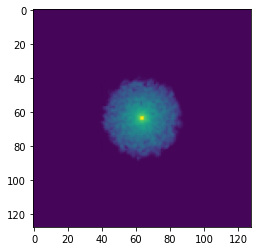

In [14]:
plt.imshow(np.log10(pyramid[0][:,:,64]))

In [41]:
def get_slice_frb(ds,
                  slice_normal,
                  slice_center,                    
                  slice_width, 
                  res=(400,400),
                  field = ('gas', 'density'),
                  apply_log=True):
    slc = yt.SlicePlot(ds, 
                       normal=slice_normal, 
                       fields=field, 
                       center=slice_center, 
                       width=slice_width,
                       buff_size=res)
    data = slc.frb[field]    
    if apply_log:
        data = np.log10(data)
    return data

def get_tiles(ds, 
              slice_normal,
              slice_center,                    
              slice_width, 
              tiles,
              tile_res,
              field = ('gas', 'density'),
              apply_log=True):
    
    slice_le = slice_center - slice_width/2.
    slice_re = slice_center + slice_width/2.
    
    # note, x,y here are convenient for thinking 
    # but do not to actual coord axes
    n_tiles_x = tiles[0]
    tile_widths = slice_width / n_tiles_x
    tile_edges_x = slice_le  * np.arange(n_tiles_x)

              
    
def get_image_pyramid(ds, 
                      slice_axis,
                      slice_coord, 
                      slice_center, 
                      slice_width,  
                      coarse_tiles,
                      coarse_tile_res,
                      refinement_levels,
                      field = ('gas', 'density')):
    # coarse_res
    slice_le = slice_center - slice_width/2
    slice_re = slice_center + slice_width/2
    
    # get a slice for each tile
    

yt : [INFO     ] 2022-07-07 11:49:34,669 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 11:49:34,670 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 11:49:34,671 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 11:49:34,671 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 11:49:34,672 Making a fixed resolution buffer of (('gas', 'density')) 400 by 400


(0.0, 400.0)

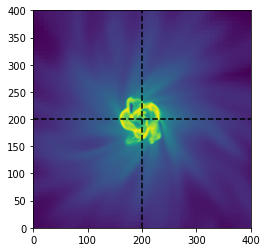

In [103]:
slc = get_slice_frb(ds, 'z', ds.domain_center, ds.domain_width/20, res=(400,400))
plt.imshow(slc)
plt.plot([200, 200], [0, 400], '--k')
plt.plot([0, 400], [200, 200], '--k')
plt.xlim([0, 400])
plt.ylim([0, 400])

yt : [INFO     ] 2022-07-07 10:59:26,214 xlim = 0.250000 0.750000
yt : [INFO     ] 2022-07-07 10:59:26,215 ylim = 0.250000 0.750000
yt : [INFO     ] 2022-07-07 10:59:26,216 xlim = 0.250000 0.750000
yt : [INFO     ] 2022-07-07 10:59:26,217 ylim = 0.250000 0.750000
yt : [INFO     ] 2022-07-07 10:59:26,218 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [68]:

coarse_tiles = {'x': 2, 'y':2}
normal = 'z'

# cross-tile width
slice_width = ds.domain_width
slice_le = ds.domain_center - slice_width/2.

# get a single axis centers and wids
axis = 'x'


In [72]:
tile_les

unyt_array([0. , 0.5], 'code_length')

In [70]:
tile_centers

unyt_array([0.25, 0.75], 'code_length')

In [71]:
tile_res

unyt_array([0.5, 1. ], 'code_length')

In [10]:
import weakref
import numpy as np
import yt 

class PyramidSlice:
    def __init__(self, ds, *, normal=None, center=None, width=None, 
                 coarse_tiles=None, coarse_tile_res=None, refinement_levels:int=2,
                 fields=('gas', 'density'),
                 transform_funcs = None):
        self.ds = weakref.proxy(ds)
        self.normal = normal
        self.normal_id = self.ds.coordinates.axis_id[normal]
        self.coarse_center = center  
        self.coarse_width = width
        self.coarse_le = center - width/2.
        self.coarse_tiles = np.asarray(coarse_tiles)
        self.coarse_tile_res = coarse_tile_res
        self.refinement_levels = refinement_levels
        self.fields = fields
        if transform_funcs is None:
            transform_funcs = []
        self.transform_funcs = transform_funcs
        self._setup_tiles()
        
    def _setup_tiles(self):
        n_tiles_by_level = [self.coarse_tiles,]        
        for _ in range(1, self.refinement_levels):
            new_tiles = n_tiles_by_level[-1] * 2
            new_tiles[self.normal_id] = 1
            n_tiles_by_level.append(new_tiles)
        self.n_tiles_by_level = n_tiles_by_level
        
        tile_centers_by_level_and_axis = []
        tile_widths_by_level_and_axis = []
        for level in range(self.refinement_levels):            
            center_vals = {}
            width_vals = {}
            for ax in range(3):
                centers, widths = self.get_tile_coords(ax, level)
                center_vals[ax] = centers
                width_vals[ax] = widths                
                    
            tile_centers_by_level_and_axis.append(center_vals)
            tile_widths_by_level_and_axis.append(width_vals)
            
        self.tile_centers_by_level_and_axis = tile_centers_by_level_and_axis
        self.tile_widths_by_level_and_axis = tile_widths_by_level_and_axis
        self.tile_slice_args_by_level = []
        for level in range(self.refinement_levels):     
            self.tile_slice_args_by_level.append(self.get_slice_args_for_level(level))
                                        
    def get_tile_coords(self, axis, level):
        if axis == self.normal_id:                    
            return ds.arr([self.coarse_center[axis]]), ds.domain_width[axis]
        
        n_tiles = self.n_tiles_by_level[level][axis]        
        ax_id = ds.coordinates.axis_id[axis]        
        tile_widths = self.coarse_width[ax_id] / n_tiles
        tile_les = self.coarse_le[ax_id] + tile_widths * np.arange(n_tiles)
        tile_centers = tile_les + tile_widths/2.
        tile_res = tile_les + tile_widths
        return tile_centers, tile_widths
        
    
    def get_slice_args_for_level(self, level):
        centers = self.tile_centers_by_level_and_axis[level]
        widths = self.tile_widths_by_level_and_axis[level]
        
        # assemble into 3d unyt arrays
        ntiles = self.n_tiles_by_level[level]
        
        tile_args = []        
        
        tile_width = ds.arr([widths[id] for id in range(3) if id!=self.normal_id])          
        res = np.asarray(self.coarse_tile_res) * (2 ** level)
        res = [res[id] for id in range(3) if id != self.normal_id]
        
        
        for itile_0 in range(ntiles[0]):
            center_0 = centers[0][itile_0]            
            for itile_1 in range(ntiles[1]):                
                center_1 = centers[1][itile_1]            
                for itile_2 in range(ntiles[2]):
                    center_2 = centers[2][itile_2]            
                    
                    tile_center = ds.arr([center_0, center_1, center_2])
                                                         
                    
                    tile_args.append({'center':tile_center, 'width':tile_width, 'buff_size':res})
                    
        return tile_args
                    
        
    def get_slice_frb(self, level, i_tile):
        tile_args = self.tile_slice_args_by_level[level][i_tile]
        slc = yt.SlicePlot(self.ds, self.normal, self.fields, **tile_args)
        
        data = slc.frb[self.fields]
        for func in self.transform_funcs:
            data = func(data)
        return data
    

    def get_level_slices(self, level):
        n_tiles = np.asarray(self.n_tiles_by_level[level]).prod()
        slice_data = []
        for i_tile in range(n_tiles):
            slice_data.append(self.get_slice_frb(level, i_tile))
        return slice_data
    
    def get_pyramid_level(self, level):
        slice_data = self.get_level_slices(level)
        return np.asarray(slice_data)
    
    def get_pyramid(self):
        #  from napari 
        # https://napari.org/howtos/layers/image.html#multiscale-images
        # A multiscale image is a list of arrays, where each array is 
        #  downsampling of the previous array in the list, so that you end 
        #  up with images of successively smaller and smaller shapes
        
        # so th
        # fine to coarse
        return [self.get_pyramid_level(lev) for lev in reversed(range(self.refinement_levels))]
        

In [33]:
def add_noise(data):
    noise_mag = data.max()/10
    return data + noise_mag * np.random.random(data.shape)

pyramid = PyramidSlice(ds, 
                       normal='y', 
                       center=ds.domain_center,
                       width= ds.domain_width, 
                       coarse_tiles =(2, 1, 2), 
                       coarse_tile_res = (100, 1, 100),
                        transform_funcs=[np.log10, add_noise])

In [34]:
multires = pyramid.get_pyramid()

yt : [INFO     ] 2022-07-07 12:54:01,711 xlim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,712 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,712 xlim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,713 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,713 Making a fixed resolution buffer of (('gas', 'density')) 200 by 200
yt : [INFO     ] 2022-07-07 12:54:01,821 xlim = 0.250000 0.500000
yt : [INFO     ] 2022-07-07 12:54:01,821 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,822 xlim = 0.250000 0.500000
yt : [INFO     ] 2022-07-07 12:54:01,823 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,823 Making a fixed resolution buffer of (('gas', 'density')) 200 by 200
yt : [INFO     ] 2022-07-07 12:54:01,928 xlim = 0.500000 0.750000
yt : [INFO     ] 2022-07-07 12:54:01,929 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:54:01,929 xlim = 0.500000 0.750000
yt : [INFO     ] 2022-07-07 12:54:01,930 ylim = 0.000000

In [35]:
multires[0].shape

(16, 200, 200)

In [36]:
multires[1].shape

(4, 100, 100)

In [37]:
v.add_image(multires, multiscale=True)

/home/chavlin/.pyenv/versions/3.9.1/envs/ytnapari/lib/python3.9/site-packages/napari/layers/image/image.py:681: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(
/home/chavlin/.pyenv/versions/3.9.1/envs/ytnapari/lib/python3.9/site-packages/napari/layers/image/image.py:681: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


<Image layer 'multires' at 0x7f933d987ac0>

In [252]:
vals = pyramid.get_slice_frb(0, 0)

yt : [INFO     ] 2022-07-07 12:36:19,643 xlim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:19,644 ylim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:19,645 xlim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:19,645 ylim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:19,646 Making a fixed resolution buffer of (('gas', 'density')) 100 by 100


In [253]:
pyramid.tile_slice_args_by_level[0]

[{'center': unyt_array([0.25, 0.5 , 0.25], 'code_length'),
  'width': unyt_array([0.5, 0.5], 'code_length'),
  'buff_size': [100, 100]},
 {'center': unyt_array([0.25, 0.5 , 0.75], 'code_length'),
  'width': unyt_array([0.5, 0.5], 'code_length'),
  'buff_size': [100, 100]},
 {'center': unyt_array([0.75, 0.5 , 0.25], 'code_length'),
  'width': unyt_array([0.5, 0.5], 'code_length'),
  'buff_size': [100, 100]},
 {'center': unyt_array([0.75, 0.5 , 0.75], 'code_length'),
  'width': unyt_array([0.5, 0.5], 'code_length'),
  'buff_size': [100, 100]}]

In [254]:
x = pyramid.tile_widths_by_level_and_axis[0]

In [255]:
x

{0: unyt_quantity(0.5, 'code_length'),
 1: unyt_quantity(1., 'code_length'),
 2: unyt_quantity(0.5, 'code_length')}

In [256]:
ds.arr([pyramid.coarse_center[0]])

unyt_array([0.5], 'code_length')

In [257]:
slc_data = pyramid.get_level_slices(0)

yt : [INFO     ] 2022-07-07 12:36:38,776 xlim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:38,776 ylim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:38,778 xlim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:38,779 ylim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:38,780 Making a fixed resolution buffer of (('gas', 'density')) 100 by 100
yt : [INFO     ] 2022-07-07 12:36:38,894 xlim = 0.500000 1.000000
yt : [INFO     ] 2022-07-07 12:36:38,894 ylim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:38,895 xlim = 0.500000 1.000000
yt : [INFO     ] 2022-07-07 12:36:38,896 ylim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:38,897 Making a fixed resolution buffer of (('gas', 'density')) 100 by 100
yt : [INFO     ] 2022-07-07 12:36:39,008 xlim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:39,008 ylim = 0.500000 1.000000
yt : [INFO     ] 2022-07-07 12:36:39,009 xlim = 0.000000 0.500000
yt : [INFO     ] 2022-07-07 12:36:39,009 ylim = 0.500000

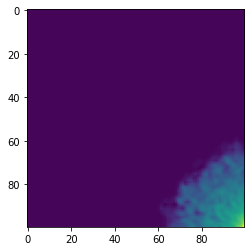

In [258]:
plt.imshow(slc_data[0])

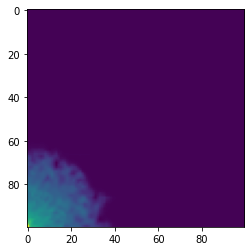

In [259]:
plt.imshow(slc_data[1])

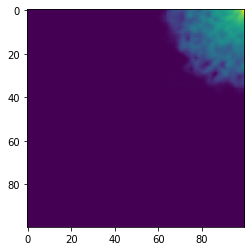

In [262]:
plt.imshow(slc_data[2])

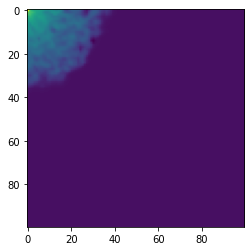

In [261]:
plt.imshow(slc_data[3])

In [263]:
pyr_level = np.asarray(slc_data)

In [264]:
pyr_level.shape

(4, 100, 100)

In [16]:
slc_data = pyramid.get_level_slices(1)

yt : [INFO     ] 2022-07-07 12:49:13,678 xlim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,679 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,680 xlim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,680 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,682 Making a fixed resolution buffer of (('gas', 'density')) 200 by 200
yt : [INFO     ] 2022-07-07 12:49:13,789 xlim = 0.250000 0.500000
yt : [INFO     ] 2022-07-07 12:49:13,790 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,790 xlim = 0.250000 0.500000
yt : [INFO     ] 2022-07-07 12:49:13,791 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,791 Making a fixed resolution buffer of (('gas', 'density')) 200 by 200
yt : [INFO     ] 2022-07-07 12:49:13,896 xlim = 0.500000 0.750000
yt : [INFO     ] 2022-07-07 12:49:13,897 ylim = 0.000000 0.250000
yt : [INFO     ] 2022-07-07 12:49:13,897 xlim = 0.500000 0.750000
yt : [INFO     ] 2022-07-07 12:49:13,898 ylim = 0.000000

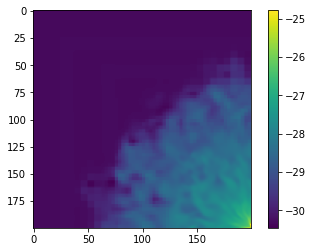

In [22]:
import matplotlib.pyplot as plt
plt.imshow(slc_data[5])
plt.colorbar()

In [38]:
import skimage

In [40]:
# https://napari.org/gallery/nD_multiscale_image_non_uniform.html
from skimage import data
from skimage.transform import pyramid_gaussian
import napari
import numpy as np


# create multiscale from astronaut image
astronaut = data.astronaut()
base = np.tile(astronaut, (3, 3, 1))
multiscale = list(
    pyramid_gaussian(base, downscale=2, max_layer=3, multichannel=True)
)
multiscale = [
    np.array([p * (abs(3 - i) + 1) / 4 for i in range(6)]) for p in multiscale
]
print('multiscale level shapes: ', [p.shape for p in multiscale])

# add image multiscale
v.add_image(multiscale, multiscale=True)

/home/chavlin/.pyenv/versions/3.9.1/envs/ytnapari/lib/python3.9/site-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `pyramid_gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


multiscale level shapes:  [(6, 1536, 1536, 3), (6, 768, 768, 3), (6, 384, 384, 3), (6, 192, 192, 3)]


<Image layer 'multiscale' at 0x7f933d6dadf0>

In [47]:
slc_finest = get_slice_frb(ds, 'z', ds.domain_center, ds.domain_width/20, res=(6400,6400))
slc_finer = get_slice_frb(ds, 'z', ds.domain_center, ds.domain_width/20, res=(3200,3200))
slc_fine = get_slice_frb(ds, 'z', ds.domain_center, ds.domain_width/20, res=(1600,1600))
slc_mid = get_slice_frb(ds, 'z', ds.domain_center, ds.domain_width/20, res=(800,800))
slc_coarse = get_slice_frb(ds, 'z', ds.domain_center, ds.domain_width/20, res=(400,400))

yt : [INFO     ] 2022-07-07 13:09:38,763 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:38,764 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:38,765 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:38,765 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:38,766 Making a fixed resolution buffer of (('gas', 'density')) 6400 by 6400
yt : [INFO     ] 2022-07-07 13:09:40,671 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:40,672 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:40,673 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:40,673 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:40,674 Making a fixed resolution buffer of (('gas', 'density')) 3200 by 3200
yt : [INFO     ] 2022-07-07 13:09:41,270 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:41,271 ylim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:41,271 xlim = 0.475000 0.525000
yt : [INFO     ] 2022-07-07 13:09:41,271 ylim = 0.47

In [48]:
multiscale = [slc_finest, slc_finer, slc_fine, slc_mid, slc_coarse]

In [59]:
v.add_image(multiscale, multiscale=True)

<Image layer 'multiscale' at 0x7f92dfd58fd0>

/home/chavlin/.pyenv/versions/3.9.1/envs/ytnapari/lib/python3.9/site-packages/napari/layers/image/image.py:681: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


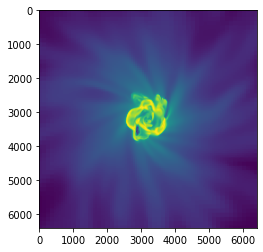

In [51]:
plt.imshow(slc_finest)

In [64]:
v.add_image(slc_mid)

<Image layer 'slc_mid' at 0x7f933d994c10>

In [54]:
v.add_image(slc_coarse)

<Image layer 'slc_coarse' at 0x7f933ce16220>

In [58]:
slc_finest.min(), slc_finest.max()

(-27.57922211980599, -23.112236886454117)